# Menghubungkan ke database PosgreSQL yang di deploy di Supabase

In [33]:
import psycopg2
from dotenv import load_dotenv
import os

load_dotenv()

conn = psycopg2.connect(
    user=os.getenv("user"),
    password=os.getenv("password"),
    host=os.getenv("host"),
    port=os.getenv("port"),
    dbname=os.getenv("dbname"),
    sslmode="require",
    connect_timeout=10
)

cur = conn.cursor()
print("Connected")


Connected


# EDA

## Memeriksa jumlah data

In [12]:
import psycopg2
from dotenv import load_dotenv
import os

load_dotenv()

conn = psycopg2.connect(
    user=os.getenv("user"),
    password=os.getenv("password"),
    host=os.getenv("host"),
    port=os.getenv("port"),
    dbname=os.getenv("dbname"),
    sslmode="require",
    connect_timeout=10
)

cur = conn.cursor()

cur.execute("SELECT COUNT(*) FROM steam;")
total_rows = cur.fetchone()[0]

cur.close()
conn.close()
   

print("Total rows:", total_rows)

Total rows: 350000


## Memeriksa struktur tabel

In [4]:
import psycopg2
from dotenv import load_dotenv
import os

load_dotenv()

conn = psycopg2.connect(
    user=os.getenv("user"),
    password=os.getenv("password"),
    host=os.getenv("host"),
    port=os.getenv("port"),
    dbname=os.getenv("dbname"),
    sslmode="require",
    connect_timeout=10
)

cur = conn.cursor()

cur.execute("""
SELECT column_name, data_type
FROM information_schema.columns
WHERE table_name = 'steam';
""")

for row in cur.fetchall():
    print(f"Nama kolom : {row[0]}\nTipe data : {row[1]}\n")
    
cur.close()
conn.close()


Nama kolom : user id
Tipe data : bigint

Nama kolom : app_id
Tipe data : text

Nama kolom : app_name
Tipe data : text

Nama kolom : review_text
Tipe data : text

Nama kolom : review_score
Tipe data : text



# Menampilkan 5 sampel data

In [7]:
import psycopg2
from dotenv import load_dotenv
import os

load_dotenv()

conn = psycopg2.connect(
    user=os.getenv("user"),
    password=os.getenv("password"),
    host=os.getenv("host"),
    port=os.getenv("port"),
    dbname=os.getenv("dbname"),
    sslmode="require",
    connect_timeout=10
)

cur = conn.cursor()

cur.execute("""
SELECT *
FROM steam
ORDER BY random()
LIMIT 5;
""")

for row in cur.fetchall():
    print(f"user_id ; {row[0]}\napp_id : {row[1]}\napp_name : {row[2]}\nreview_text : {row[3]}\nreview_score : {row[4]}\n")
    
cur.close()
conn.close()

user_id ; 135825
app_id : 227940
app_name : Heroes & Generals
review_text :  Early Access Review
review_score : -1

user_id ; 343844
app_id : 242760
app_name : The Forest
review_text :  Early Access Review
review_score : 1

user_id ; 216203
app_id : 8850
app_name : BioShock 2
review_text : Many people tells that game only follows the fame of the first. It is right, making honor of his name. 10/10 would help little sister again
review_score : 1

user_id ; 115912
app_id : 248630
app_name : Kingdoms Rise
review_text :  Early Access Review
review_score : -1

user_id ; 198030
app_id : 105600
app_name : Terraria
review_text : Im hooked on this game!
review_score : 1



# Memeriksa missing value

In [6]:
import psycopg2
from dotenv import load_dotenv
import os

load_dotenv()

conn = psycopg2.connect(
    user=os.getenv("user"),
    password=os.getenv("password"),
    host=os.getenv("host"),
    port=os.getenv("port"),
    dbname=os.getenv("dbname"),
    sslmode="require",
    connect_timeout=10
)

cur = conn.cursor()

cur.execute("""
SELECT
    COUNT(*) FILTER (WHERE app_name IS NULL) AS title_null,
    COUNT(*) FILTER (WHERE review_text IS NULL) AS review_null
FROM steam;
""")

missing = cur.fetchone()
print(f"jumlah missing app_name: {missing[0]}")
print(f"jumlah missing review_text: {missing[1]}")

cur.close()
conn.close()

jumlah missing app_name: 12391
jumlah missing review_text: 387


# Memeriksa panjang teks

In [7]:
import psycopg2
from dotenv import load_dotenv
import os

load_dotenv()

conn = psycopg2.connect(
    user=os.getenv("user"),
    password=os.getenv("password"),
    host=os.getenv("host"),
    port=os.getenv("port"),
    dbname=os.getenv("dbname"),
    sslmode="require",
    connect_timeout=10
)

cur = conn.cursor()

cur.execute("""
SELECT
    MIN(LENGTH(review_text)) AS min_len,
    MAX(LENGTH(review_text)) AS max_len,
    AVG(LENGTH(review_text)) AS avg_len
FROM steam
WHERE review_text IS NOT NULL;
""")

length = cur.fetchone()
print(f"panjang minimal {length[0]}, maksimal {length[1]}, rata-rata {length[2]:.2f}")

cur.close()
conn.close()

panjang minimal 1, maksimal 8253, rata-rata 334.36


## Top 5 teks terpanjang untuk deteksi oulier

In [8]:
import psycopg2
from dotenv import load_dotenv
import os

load_dotenv()

conn = psycopg2.connect(
    user=os.getenv("user"),
    password=os.getenv("password"),
    host=os.getenv("host"),
    port=os.getenv("port"),
    dbname=os.getenv("dbname"),
    sslmode="require",
    connect_timeout=10
)

cur = conn.cursor()

cur.execute("""
SELECT LENGTH(review_text) AS len, review_text
FROM steam
WHERE review_text IS NOT NULL
ORDER BY len DESC
LIMIT 5;
""")

for row in cur.fetchall():
    print(row[0])
    
cur.close()
conn.close()

8253
8253
8002
8000
8000


# Distribusi label

In [9]:
import psycopg2
from dotenv import load_dotenv
import os

load_dotenv()

conn = psycopg2.connect(
    user=os.getenv("user"),
    password=os.getenv("password"),
    host=os.getenv("host"),
    port=os.getenv("port"),
    dbname=os.getenv("dbname"),
    sslmode="require",
    connect_timeout=10
)

cur = conn.cursor()

cur.execute("""
SELECT review_score, COUNT(*) 
FROM steam
GROUP BY review_score
ORDER BY count DESC;
""")

for row in cur.fetchall():
    print(f"review_score: {row[0]}, count: {row[1]}")
    
cur.close()
conn.close()

review_score: -1, count: 175000
review_score: 1, count: 175000


# Preprocessing

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd

df_slang = pd.read_csv('slangs_clean.csv')

slang_dict = dict(zip(df_slang['slang'], df_slang['arti']))

nltk.download('stopwords')

stemmer_en = PorterStemmer()
stopword_en = set(stopwords.words('english'))

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n', ' ', text)
    text = re.sub(r'rt\s+', ' ', text)
    text = re.sub(r'@[\w]+', '', text)
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)
    text = re.sub('  +', ' ', text)
    return text.strip()

def remove_nonaplhanumeric(text):
    return re.sub('[^0-9a-zA-Z]+', ' ', text)

def normalize_slang(text):
    return ' '.join([
        slang_dict[word] if word in slang_dict else word
        for word in text.split()
    ])

def remove_stopword_en(text):
    return ' '.join([word for word in text.split() if word not in stopword_en])

def stemming_en(text):
    return ' '.join([stemmer_en.stem(word) for word in text.split()])

def preprocess_english(text):
    text = lowercase(text)
    text = remove_unnecessary_char(text)
    text = remove_nonaplhanumeric(text)
    text = normalize_slang(text)
    text = remove_stopword_en(text)
    text = stemming_en(text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Melakukan preprocessing data tiap batch

In [13]:
BATCH_SIZE = 5000
total_batches = (total_rows // BATCH_SIZE) + 1

print(f"Total batches: {total_batches}")

Total batches: 71


In [14]:
from tqdm import tqdm
import psycopg2
from dotenv import load_dotenv
import os

load_dotenv()

conn = psycopg2.connect(
    user=os.getenv("user"),
    password=os.getenv("password"),
    host=os.getenv("host"),
    port=os.getenv("port"),
    dbname=os.getenv("dbname"),
    sslmode="require",
    connect_timeout=10
)

cur = conn.cursor()

final_df = pd.DataFrame()
batch_num = 1

conn.rollback()
cursor = conn.cursor(name="steam_cursor")
cursor.execute("SELECT * FROM steam")

with tqdm(desc="Processing batches") as pbar:
    while True:
        rows = cursor.fetchmany(BATCH_SIZE)

        if not rows:
            break

        df_batch = pd.DataFrame(
            rows,
            columns=[desc[0] for desc in cursor.description]
        )

        df_batch["review_text_clean"] = (
            df_batch["review_text"]
            .fillna("")
            .astype(str)
            .apply(preprocess_english)
        )

        final_df = pd.concat([final_df, df_batch], ignore_index=True)

        tqdm.write(f"Batch {batch_num}: {len(df_batch)} rows processed")
        batch_num += 1
        pbar.update(1)

cursor.close()
conn.close()

Processing batches: 1it [00:04,  4.73s/it]

Batch 1: 5000 rows processed


Processing batches: 2it [00:08,  4.32s/it]

Batch 2: 5000 rows processed


Processing batches: 3it [00:12,  4.20s/it]

Batch 3: 5000 rows processed


Processing batches: 4it [00:17,  4.45s/it]

Batch 4: 5000 rows processed


Processing batches: 5it [00:22,  4.60s/it]

Batch 5: 5000 rows processed


Processing batches: 6it [00:26,  4.32s/it]

Batch 6: 5000 rows processed


Processing batches: 7it [00:29,  4.07s/it]

Batch 7: 5000 rows processed


Processing batches: 8it [00:34,  4.13s/it]

Batch 8: 5000 rows processed


Processing batches: 9it [00:38,  4.06s/it]

Batch 9: 5000 rows processed


Processing batches: 10it [00:41,  3.92s/it]

Batch 10: 5000 rows processed


Processing batches: 11it [00:45,  3.88s/it]

Batch 11: 5000 rows processed


Processing batches: 12it [00:48,  3.79s/it]

Batch 12: 5000 rows processed


Processing batches: 13it [00:52,  3.72s/it]

Batch 13: 5000 rows processed


Processing batches: 14it [00:56,  3.68s/it]

Batch 14: 5000 rows processed


Processing batches: 15it [00:59,  3.64s/it]

Batch 15: 5000 rows processed


Processing batches: 16it [01:03,  3.57s/it]

Batch 16: 5000 rows processed


Processing batches: 17it [01:06,  3.52s/it]

Batch 17: 5000 rows processed


Processing batches: 18it [01:10,  3.57s/it]

Batch 18: 5000 rows processed


Processing batches: 19it [01:13,  3.58s/it]

Batch 19: 5000 rows processed


Processing batches: 20it [01:17,  3.59s/it]

Batch 20: 5000 rows processed


Processing batches: 21it [01:20,  3.57s/it]

Batch 21: 5000 rows processed


Processing batches: 22it [01:24,  3.58s/it]

Batch 22: 5000 rows processed


Processing batches: 23it [01:28,  3.56s/it]

Batch 23: 5000 rows processed


Processing batches: 24it [01:31,  3.55s/it]

Batch 24: 5000 rows processed


Processing batches: 25it [01:34,  3.49s/it]

Batch 25: 5000 rows processed


Processing batches: 26it [01:38,  3.54s/it]

Batch 26: 5000 rows processed


Processing batches: 27it [01:42,  3.51s/it]

Batch 27: 5000 rows processed


Processing batches: 28it [01:45,  3.62s/it]

Batch 28: 5000 rows processed


Processing batches: 29it [01:49,  3.59s/it]

Batch 29: 5000 rows processed


Processing batches: 30it [01:52,  3.51s/it]

Batch 30: 5000 rows processed


Processing batches: 31it [01:56,  3.51s/it]

Batch 31: 5000 rows processed


Processing batches: 32it [01:59,  3.50s/it]

Batch 32: 5000 rows processed


Processing batches: 33it [02:03,  3.50s/it]

Batch 33: 5000 rows processed


Processing batches: 34it [02:06,  3.51s/it]

Batch 34: 5000 rows processed


Processing batches: 35it [02:11,  3.74s/it]

Batch 35: 5000 rows processed


Processing batches: 36it [02:15,  4.02s/it]

Batch 36: 5000 rows processed


Processing batches: 37it [02:20,  4.24s/it]

Batch 37: 5000 rows processed


Processing batches: 38it [02:25,  4.38s/it]

Batch 38: 5000 rows processed


Processing batches: 39it [02:29,  4.46s/it]

Batch 39: 5000 rows processed


Processing batches: 40it [02:34,  4.49s/it]

Batch 40: 5000 rows processed


Processing batches: 41it [02:38,  4.52s/it]

Batch 41: 5000 rows processed


Processing batches: 42it [02:43,  4.57s/it]

Batch 42: 5000 rows processed


Processing batches: 43it [02:48,  4.56s/it]

Batch 43: 5000 rows processed


Processing batches: 44it [02:52,  4.57s/it]

Batch 44: 5000 rows processed


Processing batches: 45it [02:57,  4.61s/it]

Batch 45: 5000 rows processed


Processing batches: 46it [03:01,  4.56s/it]

Batch 46: 5000 rows processed


Processing batches: 47it [03:06,  4.58s/it]

Batch 47: 5000 rows processed


Processing batches: 48it [03:11,  4.54s/it]

Batch 48: 5000 rows processed


Processing batches: 49it [03:15,  4.53s/it]

Batch 49: 5000 rows processed


Processing batches: 50it [03:20,  4.56s/it]

Batch 50: 5000 rows processed


Processing batches: 51it [03:24,  4.59s/it]

Batch 51: 5000 rows processed


Processing batches: 52it [03:29,  4.54s/it]

Batch 52: 5000 rows processed


Processing batches: 53it [03:33,  4.56s/it]

Batch 53: 5000 rows processed


Processing batches: 54it [03:38,  4.48s/it]

Batch 54: 5000 rows processed


Processing batches: 55it [03:43,  4.64s/it]

Batch 55: 5000 rows processed


Processing batches: 56it [03:47,  4.61s/it]

Batch 56: 5000 rows processed


Processing batches: 57it [03:52,  4.57s/it]

Batch 57: 5000 rows processed


Processing batches: 58it [03:56,  4.61s/it]

Batch 58: 5000 rows processed


Processing batches: 59it [04:01,  4.53s/it]

Batch 59: 5000 rows processed


Processing batches: 60it [04:05,  4.51s/it]

Batch 60: 5000 rows processed


Processing batches: 61it [04:10,  4.46s/it]

Batch 61: 5000 rows processed


Processing batches: 62it [04:14,  4.48s/it]

Batch 62: 5000 rows processed


Processing batches: 63it [04:19,  4.49s/it]

Batch 63: 5000 rows processed


Processing batches: 64it [04:23,  4.53s/it]

Batch 64: 5000 rows processed


Processing batches: 65it [04:28,  4.49s/it]

Batch 65: 5000 rows processed


Processing batches: 66it [04:32,  4.55s/it]

Batch 66: 5000 rows processed


Processing batches: 67it [04:37,  4.65s/it]

Batch 67: 5000 rows processed


Processing batches: 68it [04:42,  4.80s/it]

Batch 68: 5000 rows processed


Processing batches: 69it [04:47,  4.89s/it]

Batch 69: 5000 rows processed


Processing batches: 70it [04:52,  4.18s/it]


Batch 70: 5000 rows processed


In [28]:
final_df['app_name'].isna().sum()

12391

In [29]:
before = final_df.shape[0]

final_df = final_df.dropna(subset=['app_name'])

after = final_df.shape[0]

print(f"Jumlah data sebelum  : {before}")
print(f"Jumlah data sesudah  : {after}")
print(f"Data terhapus        : {before - after}")

Jumlah data sebelum  : 350000
Jumlah data sesudah  : 337609
Data terhapus        : 12391


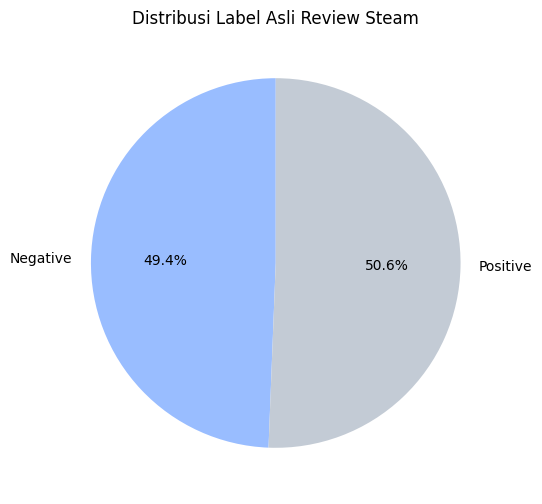

In [30]:
import matplotlib.pyplot as plt

# Pastikan label bertipe integer
final_df["review_score"] = final_df["review_score"].astype(int)

# Hitung jumlah masing-masing label
label_counts = final_df["review_score"].value_counts().sort_index()  # -1 = Negative, 1 = Positive

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    label_counts,
    labels=["Negative", "Positive"],
    autopct="%1.1f%%",
    colors=["#99BDFF", "#C3CBD5"],  # warna pastel
    startangle=90
)
plt.title("Distribusi Label Asli Review Steam")
plt.show()

# File Hasil Prerocessing

In [31]:
final_df.to_csv(
    "final_df.csv",
    index=False,
    encoding="utf-8"
)


In [3]:
import pandas as pd

# Membaca file CSV
final_df = pd.read_csv("final_df.csv")

# Menampilkan 5 baris pertama
final_df.head()


,user id,app_id,app_name,review_text,review_score,review_text_clean
0,178558,310700,Super Win the Game,HOTDAMN! This game is great! A proper follow u...,1,hotdamn game great proper follow win game c si...
1,178559,228380,Wreckfest,Early Access Review,1,earli access review
2,178560,221100,DayZ,Early Access Review,1,earli access review
3,178561,265630,Fistful of Frags,"I love this game, its a fun free to play weste...",1,love game fun free play western shooter gun ac...
4,178562,570,Dota 2,dota 2 is the best game ever i've been played,1,dota best game ever play


# Ekstraksi Fitur

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = final_df['review_text_clean'].fillna('').astype(str)
y = final_df['review_score']

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.9
)

X_tfidf = tfidf.fit_transform(X)
print(X_tfidf.shape)

(337609, 5000)


# Split Data 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Logistic Regression

## Training Model

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluasi Model


In [59]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\n' + classification_report(
    y_test,
    y_pred,
    labels=[-1, 1],
    target_names=["Negatif", "Positif"]
))

[[36128  5548]
 [11606 31121]]

              precision    recall  f1-score   support

     Negatif       0.76      0.87      0.81     41676
     Positif       0.85      0.73      0.78     42727

    accuracy                           0.80     84403
   macro avg       0.80      0.80      0.80     84403
weighted avg       0.80      0.80      0.80     84403



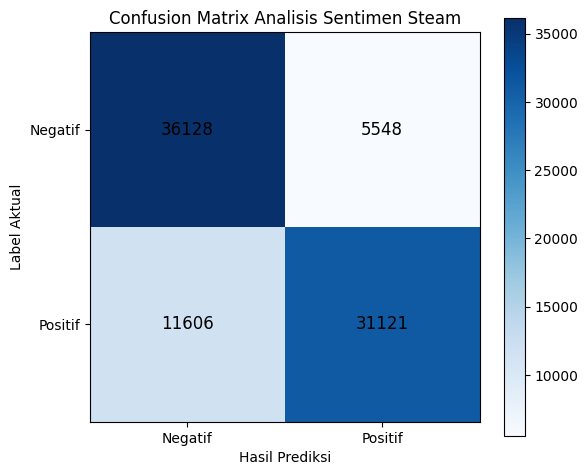

In [60]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["Negatif", "Positif"]

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")  
plt.title("Confusion Matrix Analisis Sentimen Steam")
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Angka di dalam kotak
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm[i, j],
            ha="center", va="center",
            fontsize=12,
            color="black"
        )

plt.xlabel("Hasil Prediksi")
plt.ylabel("Label Aktual")
plt.tight_layout()
plt.show()


In [61]:
import joblib

joblib.dump(logreg, "logistic_regression_tfidf 80.pkl")
print("Model berhasil disimpan")


Model berhasil disimpan


In [7]:
import joblib
import pandas as pd

# Load model Logistic Regression
logreg = joblib.load("logistic_regression_tfidf 80.pkl")

# Prediksi
y_pred = logreg.predict(X_test)

# Gabungkan semua informasi
hasil_df = pd.DataFrame({
    "user id": final_df.loc[y_test.index, "user id"],
    "app_id": final_df.loc[y_test.index, "app_id"],
    "app_name": final_df.loc[y_test.index, "app_name"],
    "review_text": final_df.loc[y_test.index, "review_text"],
    "review_text_clean": final_df.loc[y_test.index, "review_text_clean"],
    "review_score": y_test.values,
    "hasil_prediksi": y_pred
})

# Simpan ke CSV
hasil_df.to_csv(
    "hasil_prediksi_logistic_regression.csv",
    index=False,
    encoding="utf-8"
)



# Hasil Prediksi

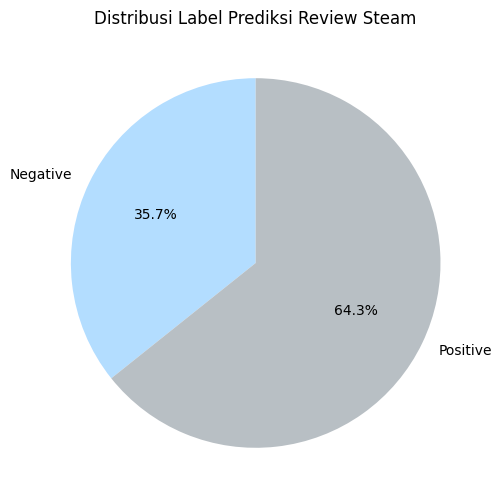

In [62]:
X_all = tfidf.transform(final_df["review_text"].astype(str))
final_df["prediksi"] = logreg.predict(X_all).astype(int)

# Hitung jumlah prediksi
pred_counts = final_df["prediksi"].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(
    pred_counts,
    labels=["Negative", "Positive"],
    autopct="%1.1f%%",
    colors=["#B3DDFF", "#B8BFC4"],
    startangle=90
)
plt.title("Distribusi Label Prediksi Review Steam")
plt.show()

In [63]:
row_52 = final_df.iloc[51] 

# Transform teks
X_row52 = tfidf.transform([row_52["review_text"]])
y_row52_pred = logreg.predict(X_row52)[0]

# Pastikan tipe integer
y_row52_pred = int(y_row52_pred)
label_map = {1: "Positive", -1: "Negative"}

print("Review text:", row_52["review_text"])
print("Label asli:", row_52["review_score"])
print("Prediksi:", label_map[y_row52_pred])

Review text: This game is getting lame and why is there so many DLC ???
Label asli: -1
Prediksi: Negative


In [64]:
row_63 = final_df.iloc[63] 

# Transform teks
X_row63 = tfidf.transform([row_63["review_text"]])
y_row63_pred = logreg.predict(X_row63)[0]
# Pastikan tipe integer
y_row63_pred = int(y_row63_pred)
label_map = {1: "Positive", -1: "Negative"}

print("Review text:", row_63["review_text"])
print("Label asli:", row_63["review_score"])
print("Prediksi:", label_map[y_row63_pred])

Review text: Boring after the first few hours.
Label asli: -1
Prediksi: Positive


In [65]:
terra_samples = final_df[
    (final_df["app_name"] == "Terraria") &
    (final_df["review_score"] == 1)
][["review_text", "review_score"]].copy()

terra_samples


,review_text,review_score
2582,Terraria is not a 2D Minecraft in any way othe...,1
4660,Can I play with you on terraria,1
4668,Once every year I play this game start to fini...,1
12698,Terraria is one of the best games I have ever ...,1
13783,I never hated bats more in my entire life.,1
...,...,...
264767,i love this game so much,1
276291,Its good,1
337504,Best Game in The World.,1
337526,Greate game,1


In [67]:
row = terra_samples.iloc[2]

# Transform teks
X_row = tfidf.transform([row["review_text"]])
y_row_pred = logreg.predict(X_row)[0]

# Pastikan tipe integer
y_row_pred = int(y_row_pred)
label_map = {1: "Positive", -1: "Negative"}

print("Review text:", row["review_text"])
print("Label asli:", row["review_score"])
print("Prediksi:", label_map[y_row_pred])

Review text: Once every year I play this game start to finish and it's always lovely all over again.
Label asli: 1
Prediksi: Negative


In [68]:
row = terra_samples.iloc[2730]

# Transform teks
X_row = tfidf.transform([row["review_text"]])
y_row_pred = logreg.predict(X_row)[0]

# Pastikan tipe integer
y_row_pred = int(y_row_pred)
label_map = {1: "Positive", -1: "Negative"}

print("Review text:", row["review_text"])
print("Label asli:", row["review_score"])
print("Prediksi:", label_map[y_row_pred])

Review text: i love this game so much
Label asli: 1
Prediksi: Positive


# Random Forest

## Training Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Evaluasi Model

In [19]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\n' + classification_report(
    y_test,
    y_pred,
    labels=[-1, 1],
    target_names=["Negatif", "Positif"]
))

[[35778  5898]
 [13214 29513]]

              precision    recall  f1-score   support

     Negatif       0.73      0.86      0.79     41676
     Positif       0.83      0.69      0.76     42727

    accuracy                           0.77     84403
   macro avg       0.78      0.77      0.77     84403
weighted avg       0.78      0.77      0.77     84403



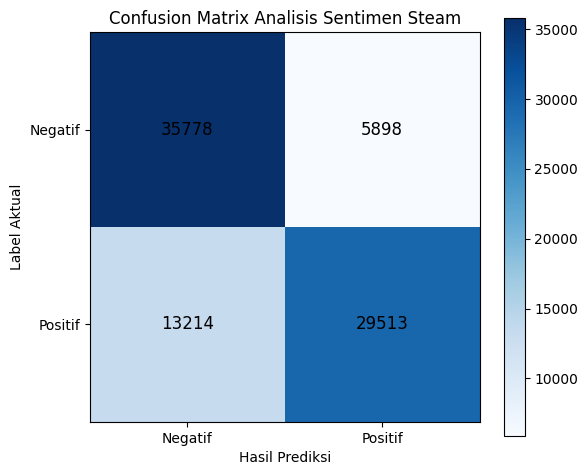

In [22]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["Negatif", "Positif"]

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")  
plt.title("Confusion Matrix Analisis Sentimen Steam")
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Angka di dalam kotak
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm[i, j],
            ha="center", va="center",
            fontsize=12,
            color="black"
        )

plt.xlabel("Hasil Prediksi")
plt.ylabel("Label Aktual")
plt.tight_layout()
plt.show()


In [20]:
import joblib

joblib.dump(clf, "randomforest_model.pkl")
print(" Model berhasil disimpan")

 Model berhasil disimpan


# Hasil Prediksi

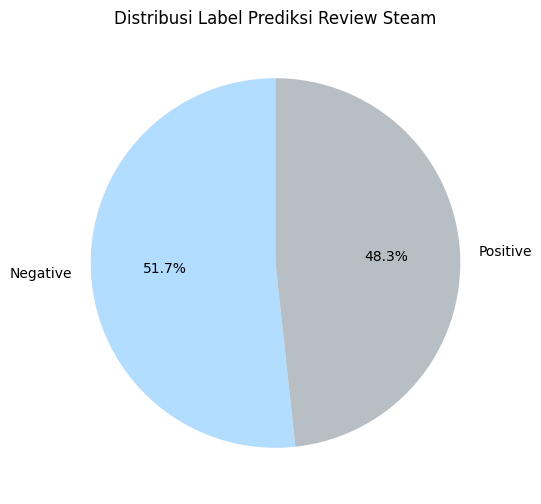

In [21]:
X_all = tfidf.transform(final_df["review_text"].astype(str))
final_df["prediksi"] = clf.predict(X_all).astype(int)

# Hitung jumlah prediksi
pred_counts = final_df["prediksi"].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(
    pred_counts,
    labels=["Negative", "Positive"],
    autopct="%1.1f%%",
    colors=["#B3DDFF", "#B8BFC4"],
    startangle=90
)
plt.title("Distribusi Label Prediksi Review Steam")
plt.show()

In [25]:
row_52 = final_df.iloc[51] 

# Transform teks
X_row52 = tfidf.transform([row_52["review_text"]])
y_row52_pred = clf.predict(X_row52)[0]

# Pastikan tipe integer
y_row52_pred = int(y_row52_pred)
label_map = {1: "Positive", -1: "Negative"}

print("Review text:", row_52["review_text"])
print("Label asli:", row_52["review_score"])
print("Prediksi:", label_map[y_row52_pred])

Review text: I ruined my real life 10/10
Label asli: 1
Prediksi: Positive


In [43]:
import joblib
import pandas as pd

# Load model Random Forest
clf = joblib.load("randomforest_model.pkl")

# Prediksi
y_pred = clf.predict(X_test)

# Gabungkan semua informasi
hasil_df = pd.DataFrame({
    "user id": final_df.loc[y_test.index, "user id"],
    "app_id": final_df.loc[y_test.index, "app_id"],
    "app_name": final_df.loc[y_test.index, "app_name"],
    "review_text": final_df.loc[y_test.index, "review_text"],
    "review_text_clean": final_df.loc[y_test.index, "review_text_clean"],
    "review_score": y_test.values,
    "hasil_prediksi": y_pred
})

# Simpan ke CSV
hasil_df.to_csv(
    "hasil_prediksi_random_forest.csv",
    index=False,
    encoding="utf-8"
)




# SVM

## Training Model

In [19]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluasi Model

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\n' + classification_report(
    y_test,
    y_pred,
    labels=[-1, 1],
    target_names=["Negatif", "Positif"]
))

[[37938  5812]
 [12072 31678]]

              precision    recall  f1-score   support

     Negatif       0.76      0.87      0.81     43750
     Positif       0.84      0.72      0.78     43750

   micro avg       0.80      0.80      0.80     87500
   macro avg       0.80      0.80      0.79     87500
weighted avg       0.80      0.80      0.79     87500



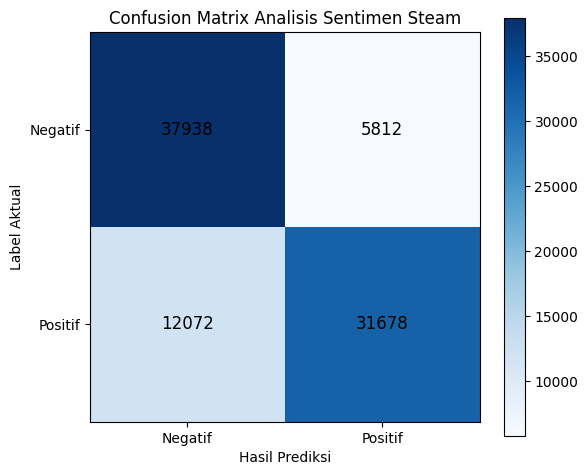

In [23]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["Negatif", "Positif"] 

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")  
plt.title("Confusion Matrix Analisis Sentimen Steam")
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Angka di dalam kotak
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm[i, j],
            ha="center", va="center",
            fontsize=12,
            color="black"
        )

plt.xlabel("Hasil Prediksi")
plt.ylabel("Label Aktual")
plt.tight_layout()
plt.show()


In [25]:
import joblib

joblib.dump(svm, "svm_model.pkl")
print("Model berhasil disimpan")

Model berhasil disimpan


In [32]:
row_52 = final_df.iloc[51] 

# Transform teks
X_row52 = tfidf.transform([row_52["review_text"]])
y_row52_pred = svm.predict(X_row52)[0]

# Pastikan tipe integer
y_row52_pred = int(y_row52_pred)
label_map = {1: "Positive", -1: "Negative"}

print("Review text:", row_52["review_text"])
print("Label asli:", row_52["review_score"])
print("Prediksi:", label_map[y_row52_pred])

Review text: I ruined my real life 10/10
Label asli: 1
Prediksi: Positive


In [6]:
import joblib
import pandas as pd

# Load model SVM
svm = joblib.load("svm_model.pkl")

# Prediksi
y_pred = svm.predict(X_test)

# Gabungkan semua informasi
hasil_df = pd.DataFrame({
    "user id": final_df.loc[y_test.index, "user id"],
    "app_id": final_df.loc[y_test.index, "app_id"],
    "app_name": final_df.loc[y_test.index, "app_name"],
    "review_text": final_df.loc[y_test.index, "review_text"],
    "review_text_clean": final_df.loc[y_test.index, "review_text_clean"],
    "review_score": y_test.values,
    "hasil_prediksi": y_pred
})

# Simpan ke CSV
hasil_df.to_csv(
    "hasil_prediksi_svm.csv",
    index=False,
    encoding="utf-8"
)



# Rekomendasi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17260\3677996447.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(top_positive_apps.index, rotation=20)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17260\3677996447.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(top_negative_apps.index, rotation=20)


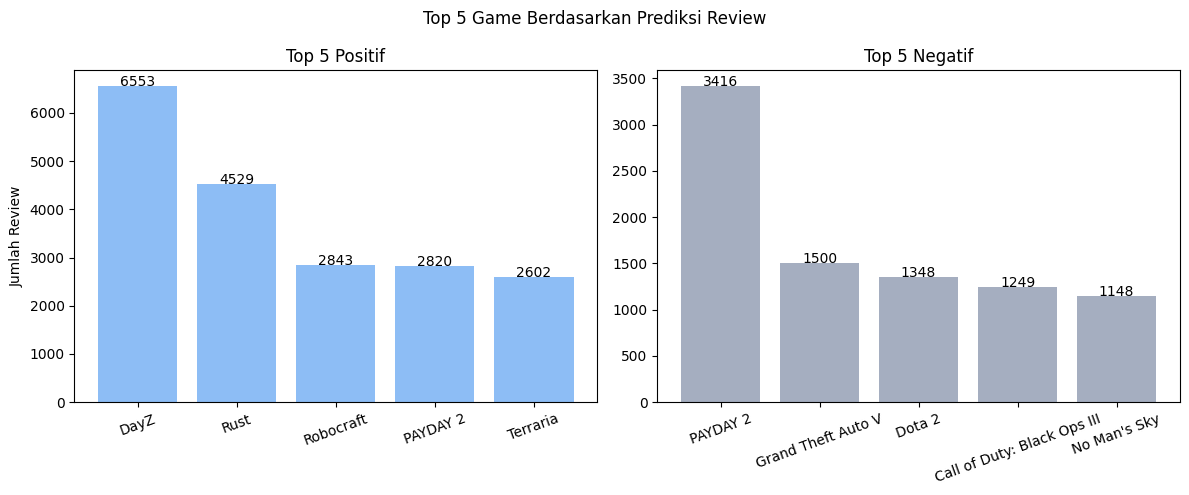

In [69]:
import matplotlib.pyplot as plt

# Top 5 positif & negatif
top_positive_apps = final_df[final_df["prediksi"] == 1]["app_name"].value_counts().head(5)
top_negative_apps = final_df[final_df["prediksi"] == -1]["app_name"].value_counts().head(5)

fig, axes = plt.subplots(1, 2, figsize=(12,5))  # 1 row, 2 column

# Plot positif
axes[0].bar(top_positive_apps.index, top_positive_apps.values, color="#8DBDF5")
axes[0].set_title("Top 5 Positif")
axes[0].set_ylabel("Jumlah Review")
axes[0].set_xticklabels(top_positive_apps.index, rotation=20)
for i, v in enumerate(top_positive_apps.values):
    axes[0].text(i, v , str(v), ha='center')

# Plot negatif
axes[1].bar(top_negative_apps.index, top_negative_apps.values, color="#A5AEC0")
axes[1].set_title("Top 5 Negatif")
axes[1].set_xticklabels(top_negative_apps.index, rotation=20)
for i, v in enumerate(top_negative_apps.values):
    axes[1].text(i, v , str(v), ha='center')

plt.suptitle("Top 5 Game Berdasarkan Prediksi Review")
plt.tight_layout()
plt.show()